Saving pd_speech_features.csv to pd_speech_features.csv
=== PODSTAWOWE INFORMACJE O DANYCH ===
Rozmiar danych: (756, 755)

=== TYPY DANYCH ===
id                             int64
gender                         int64
PPE                          float64
DFA                          float64
RPDE                         float64
                              ...   
tqwt_kurtosisValue_dec_33    float64
tqwt_kurtosisValue_dec_34    float64
tqwt_kurtosisValue_dec_35    float64
tqwt_kurtosisValue_dec_36    float64
class                          int64
Length: 755, dtype: object

=== PODSTAWOWE STATYSTYKI ===
               id      gender         PPE         DFA        RPDE   numPulses  \
count  756.000000  756.000000  756.000000  756.000000  756.000000  756.000000   
mean   125.500000    0.515873    0.746284    0.700414    0.489058  323.972222   
std     72.793721    0.500079    0.169294    0.069718    0.137442   99.219059   
min      0.000000    0.000000    0.041551    0.543500    0.154300   

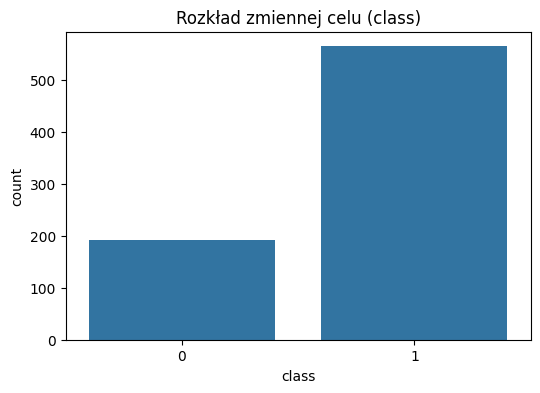


=== PODZIAŁ DANYCH ===
Zbiór treningowy: (529, 754)
Zbiór testowy: (227, 754)

=== WYNIKI KLASYFIKACJI ===
Dokładność (Accuracy): 0.8458

=== MACIERZ POMYŁEK ===


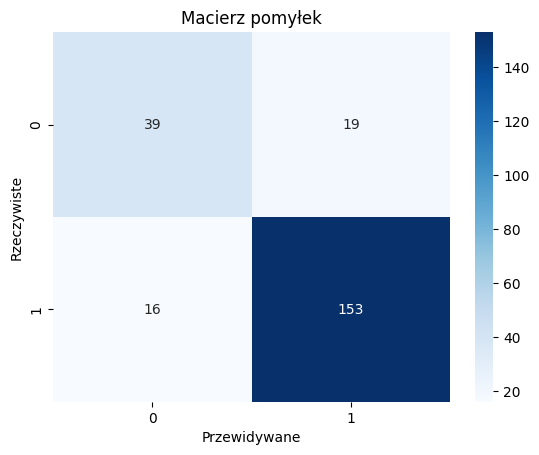


=== RAPORT KLASYFIKACJI ===
              precision    recall  f1-score   support

           0       0.71      0.67      0.69        58
           1       0.89      0.91      0.90       169

    accuracy                           0.85       227
   macro avg       0.80      0.79      0.79       227
weighted avg       0.84      0.85      0.84       227


=== TOP 10 NAJWAŻNIEJSZYCH CECH ===
                       feature  importance
33                          b4    0.655498
404    tqwt_entropy_log_dec_11    0.646227
511    tqwt_medianValue_dec_10    0.643419
750  tqwt_kurtosisValue_dec_33    0.627002
704  tqwt_skewnessValue_dec_23    0.610323
426    tqwt_entropy_log_dec_33    0.588157
744  tqwt_kurtosisValue_dec_27    0.582104
64          mean_MFCC_7th_coef    0.571706
136        std_9th_delta_delta    0.547849
519    tqwt_medianValue_dec_18    0.547584


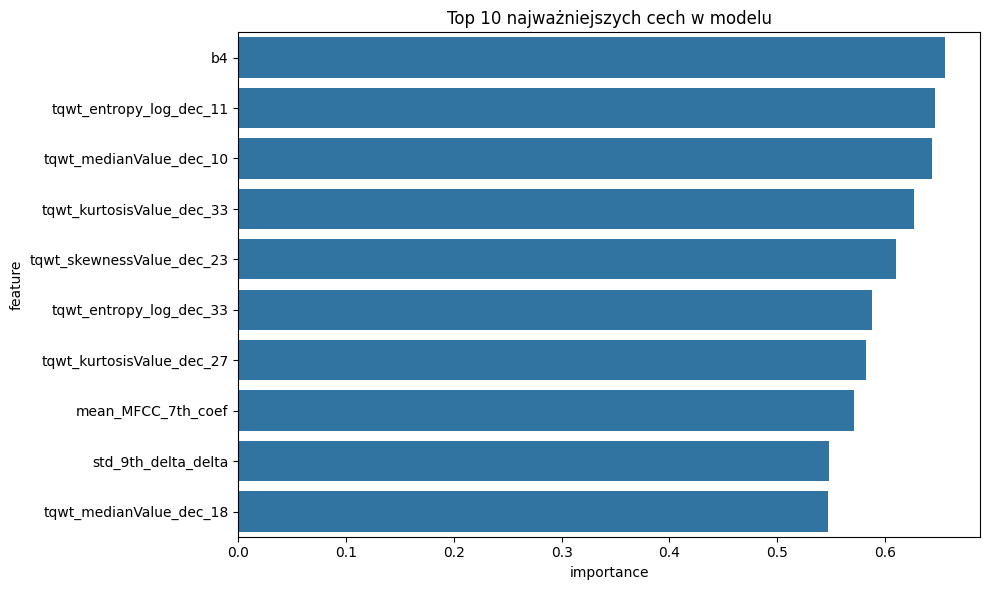

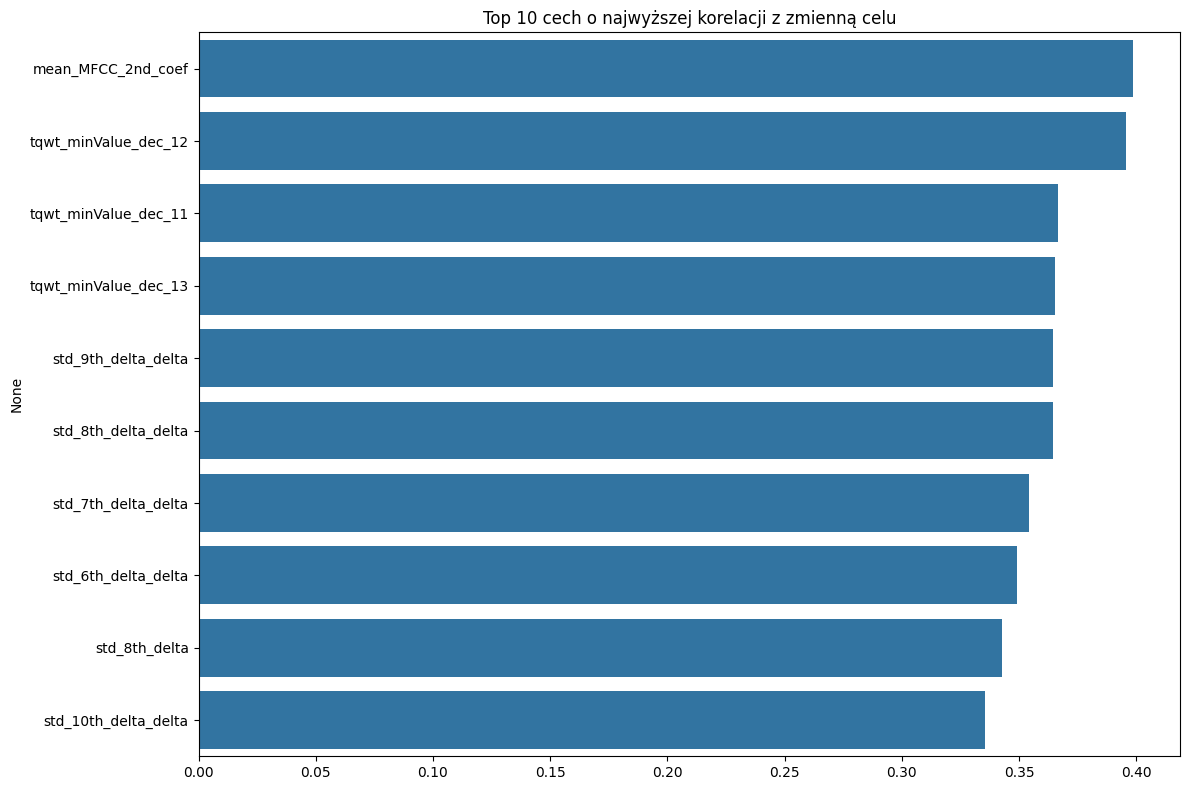

In [ ]:
# Krok 1: Import niezbędnych bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Krok 2: Wczytanie danych - najpierw przesłanie pliku z komputera
from google.colab import files
uploaded = files.upload()

# Pobierz nazwę przesłanego pliku (zakładamy, że przesłano jeden plik o nazwie 'pd_speech_features.csv')
# Jeśli plik ma inną nazwę, zmień poniższą linię
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Krok 3: Eksploracyjna analiza danych
print("=== PODSTAWOWE INFORMACJE O DANYCH ===")
print(f"Rozmiar danych: {df.shape}")
print("\n=== TYPY DANYCH ===")
print(df.dtypes)
print("\n=== PODSTAWOWE STATYSTYKI ===")
print(df.describe())

# Sprawdzenie brakujących wartości
print("\n=== BRAKUJĄCE WARTOŚCI ===")
print(df.isnull().sum().sum())

# Analiza zmiennej celu 'class'
print("\n=== ROZKŁAD ZMIENNEJ CELU 'class' ===")
print(df['class'].value_counts())
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df)
plt.title('Rozkład zmiennej celu (class)')
plt.show()

# Krok 4: Podział na zbiór treningowy i testowy
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print(f"\n=== PODZIAŁ DANYCH ===")
print(f"Zbiór treningowy: {X_train.shape}")
print(f"Zbiór testowy: {X_test.shape}")

# Krok 5: Skalowanie cech
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Krok 6: Trenowanie modelu regresji logistycznej
model = LogisticRegression(
    random_state=42,
    max_iter=1000,
    solver='liblinear'
)
model.fit(X_train_scaled, y_train)

# Krok 7: Ewaluacja modelu
y_pred = model.predict(X_test_scaled)

print("\n=== WYNIKI KLASYFIKACJI ===")
print(f"Dokładność (Accuracy): {accuracy_score(y_test, y_pred):.4f}")

print("\n=== MACIERZ POMYŁEK ===")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Macierz pomyłek')
plt.ylabel('Rzeczywiste')
plt.xlabel('Przewidywane')
plt.show()

print("\n=== RAPORT KLASYFIKACJI ===")
print(classification_report(y_test, y_pred))

# Krok 8: Analiza ważności cech
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': abs(model.coef_[0])
}).sort_values('importance', ascending=False)

print("\n=== TOP 10 NAJWAŻNIEJSZYCH CECH ===")
print(feature_importance.head(10))

# Wizualizacja top 10 cech
plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 najważniejszych cech w modelu')
plt.tight_layout()
plt.show()

# Dodatkowa analiza: Korelacje z zmienną celu
plt.figure(figsize=(12,8))
correlations = df.corr()['class'].sort_values(ascending=False)[1:11]  # Top 10 bez samej siebie
sns.barplot(x=correlations.values, y=correlations.index)
plt.title('Top 10 cech o najwyższej korelacji z zmienną celu')
plt.tight_layout()
plt.show()